In [ ]:
# Author: Janssen Kotah
# snRNAseq analysis for WT/SHIP1 KO mice as part of Matera et al. project
# CellChat analysis based on package vignette: https://github.com/sqjin/CellChat


In [3]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(CellChat)
library(patchwork)

Warning message:
“package ‘Seurat’ was built under R version 4.1.3”
The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph

Warning message:
“package ‘igraph’ was built under R version 4.1.3”

Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
cellchat.WT <- readRDS("001A_CellChat_all_clusters_WT.rds")
cellchat.KO <- readRDS("001B_CellChat_all_clusters_KO.rds")

object.list <- list(Wt = cellchat.WT, KO = cellchat.KO)
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
cellchat

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



An object of class CellChat created from a merged object with multiple datasets 
 873 signaling genes.
 47313 cells. 
CellChat analysis of single cell RNA-seq data! 

In [3]:
saveRDS(cellchat, "001C_KOvsWT_allClusters_combined_cellchat.rds")

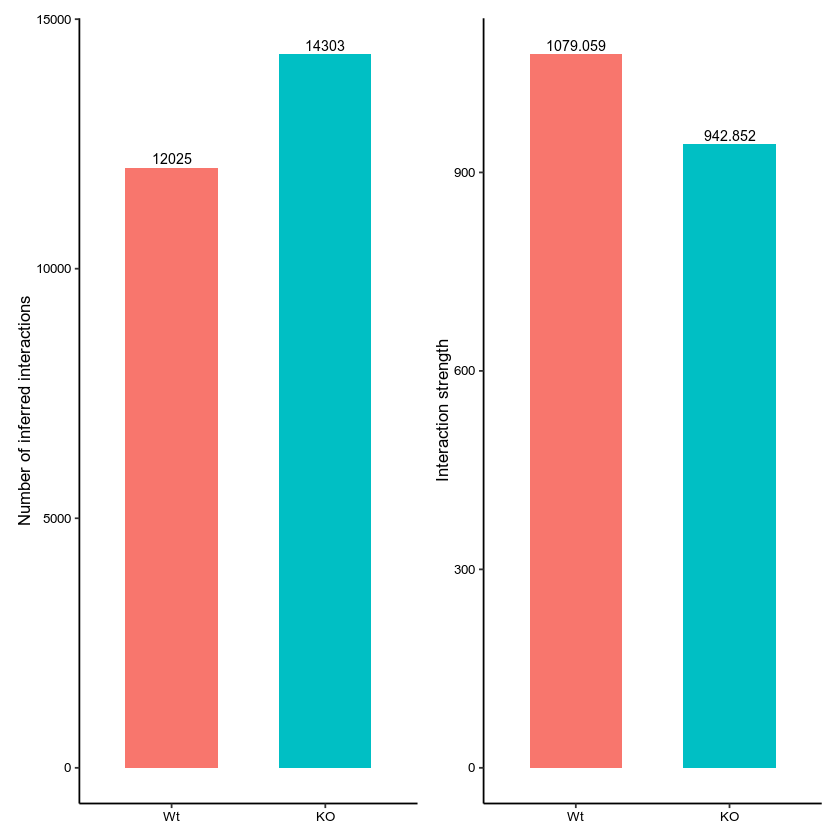

In [4]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
gg1 + gg2

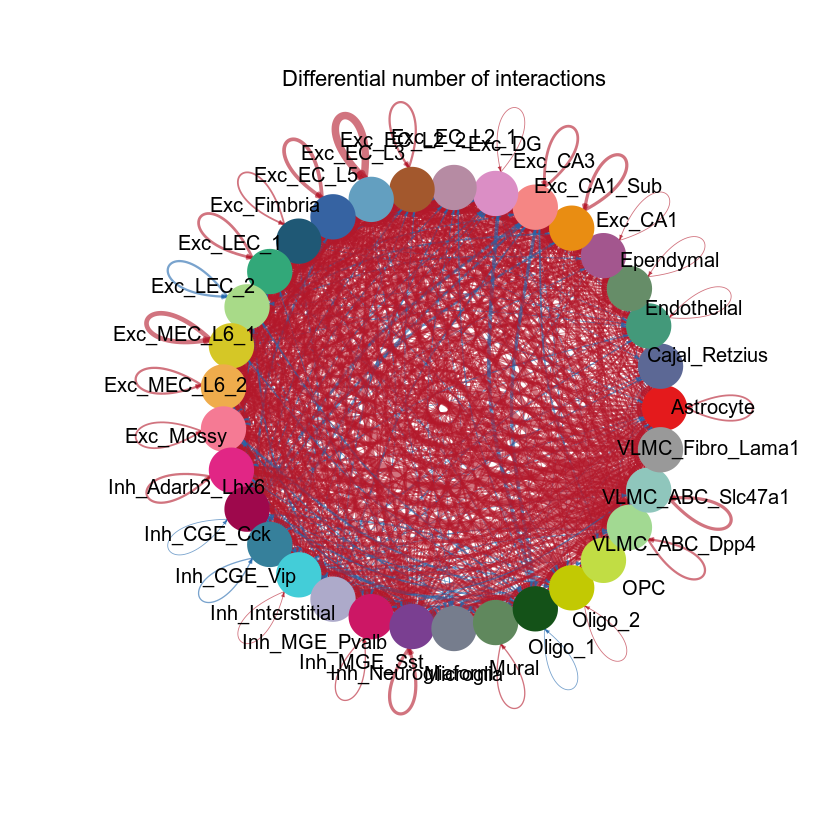

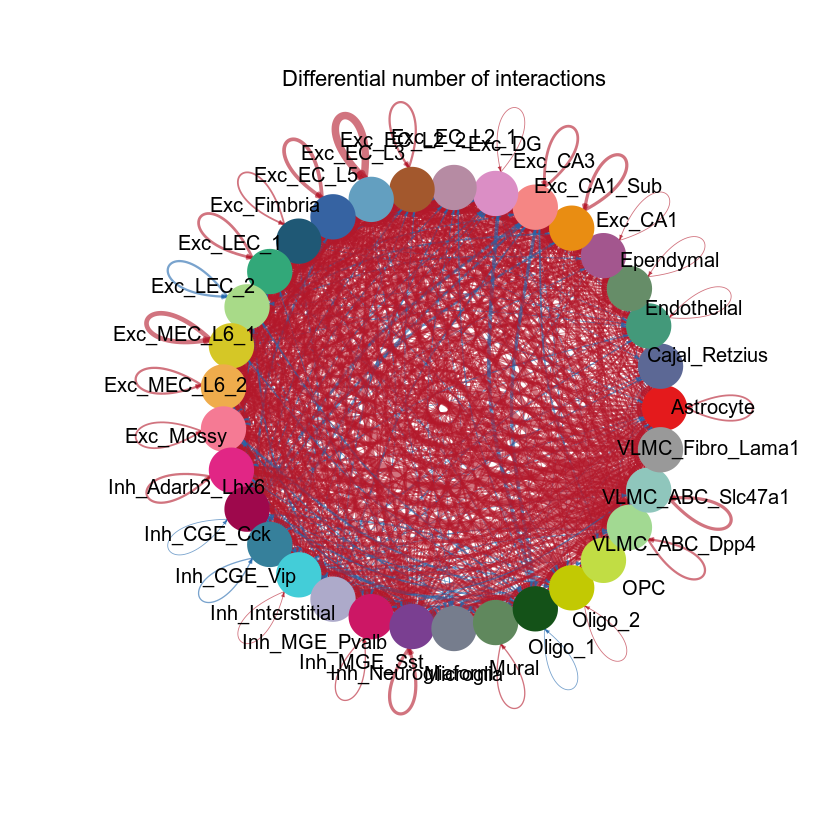

In [5]:
#red (or blue) colored edges represent increased (or decreased) signaling in the second dataset 
#red = increased in KO
netVisual_diffInteraction(cellchat, weight.scale = T)


In [8]:
celltypes <- cellchat.WT@idents %>% levels()
celltypes

[1] "Astrocyte"         "Cajal_Retzius"     "Endothelial"      
 [4] "Ependymal"         "Exc_CA1"           "Exc_CA1_Sub"      
 [7] "Exc_CA3"           "Exc_DG"            "Exc_EC_L2_1"      
[10] "Exc_EC_L2_2"       "Exc_EC_L3"         "Exc_EC_L5"        
[13] "Exc_Fimbria"       "Exc_LEC_1"         "Exc_LEC_2"        
[16] "Exc_MEC_L6_1"      "Exc_MEC_L6_2"      "Exc_Mossy"        
[19] "Inh_Adarb2_Lhx6"   "Inh_CGE_Cck"       "Inh_CGE_Vip"      
[22] "Inh_Interstitial"  "Inh_MGE_Pvalb"     "Inh_MGE_Sst"      
[25] "Inh_Neurogliaform" "Microglia"         "Mural"            
[28] "Oligo_1"           "Oligo_2"           "OPC"              
[31] "VLMC_ABC_Dpp4"     "VLMC_ABC_Slc47a1"  "VLMC_Fibro_Lama1"

In [9]:
#visualize signaling from each cell group
pdf("001C_KOvsWT_netInteractions.pdf", width = 10, height = 10)


for (each in celltypes){
    p1 <- netVisual_diffInteraction(cellchat, weight.scale = T, 
                                    title.name = paste0("Differential number of interactions from ", each),
                                    sources.use = each)
    print(p1)
    p2 <- netVisual_diffInteraction(cellchat, weight.scale = T, measure = "weight", 
                                    title.name = paste0("Differential interaction strength from ", each),
                                    sources.use = each)
    print(p2)
}

dev.off()

png 
  2

Do heatmap based on a merged object 




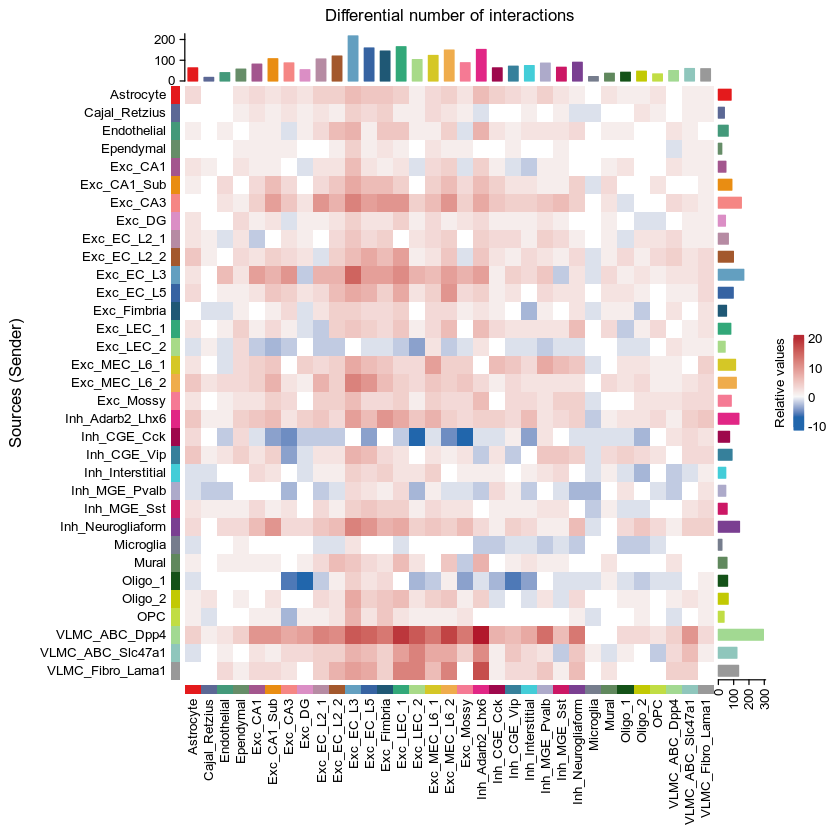

In [10]:
gg1 <- netVisual_heatmap(cellchat)
gg1

Do heatmap based on a merged object 




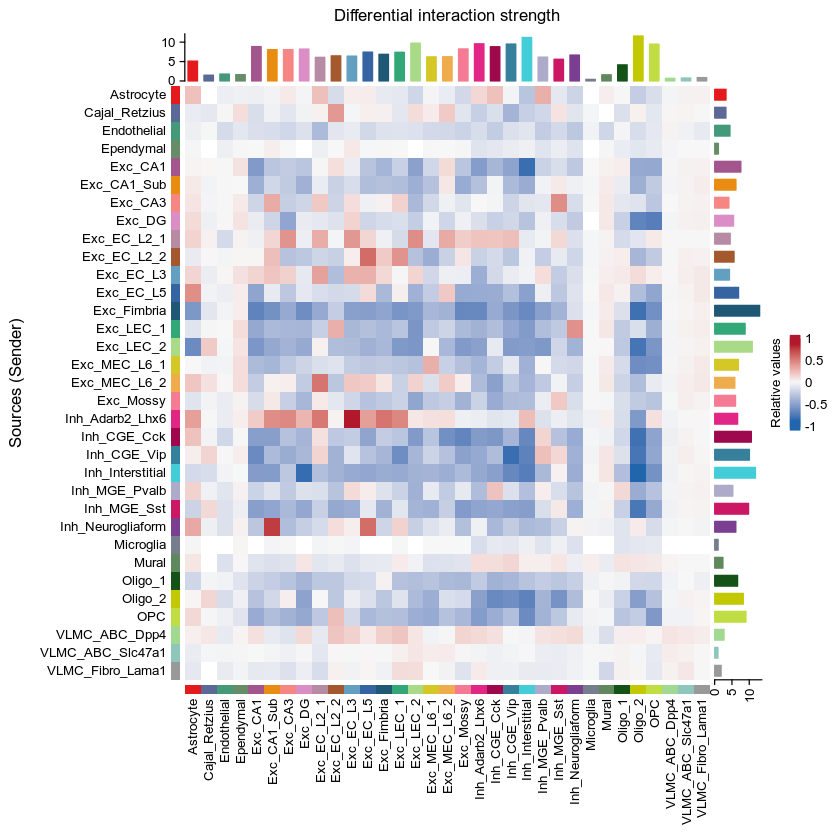

In [11]:
gg2 <- netVisual_heatmap(cellchat, measure = "weight")
gg2

In [15]:
pdf("001C_KOvsWT_majorCelltypes_signaling_changes_per_celltype.pdf")

for (each in celltypes){
    p <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = each)
    print(p)
}

dev.off()

Visualizing differential outgoing and incoming signaling changes from Wt to KO

The following `from` values were not present in `x`: 2

Visualizing differential outgoing and incoming signaling changes from Wt to KO

The following `from` values were not present in `x`: 2

Visualizing differential outgoing and incoming signaling changes from Wt to KO

Visualizing differential outgoing and incoming signaling changes from Wt to KO

Visualizing differential outgoing and incoming signaling changes from Wt to KO

The following `from` values were not present in `x`: 2

Visualizing differential outgoing and incoming signaling changes from Wt to KO

The following `from` values were not present in `x`: 2

Visualizing differential outgoing and incoming signaling changes from Wt to KO

Visualizing differential outgoing and incoming signaling changes from Wt to KO

The following `from` values were not present in `x`: 2

Visualizing differential outgoing and incoming signaling changes from Wt to KO



png 
  2

In [16]:
pdf("001C_KOvsWT_majorCelltypes_relative_info_flow_per_celltype.pdf", width = 8, height = 11)

for (each in celltypes){
    
    p1 <- rankNet(cellchat, mode = "comparison", sources.use = each, stacked = T, do.stat = TRUE)    
    p2 <- rankNet(cellchat, mode = "comparison", sources.use = each, stacked = F,show.raw = T, do.stat = TRUE)

    print(p1 + p2 + plot_layout(guides = 'collect') + plot_annotation(title = paste0("Showing for signaling FROM: ", each)))
}

dev.off()

png 
  2

In [17]:
library(ComplexHeatmap)


Loading required package: grid

ComplexHeatmap version 2.15.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [18]:
i = 1
# combining all the identified signaling pathways from different datasets 
pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i],font.size = 6)
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "outgoing", signaling = pathway.union, title = names(object.list)[i+1],font.size = 6)


In [19]:
ht3 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "incoming", signaling = pathway.union, title = names(object.list)[i],  color.heatmap = "GnBu",font.size = 6)
ht4 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "incoming", signaling = pathway.union, title = names(object.list)[i+1], color.heatmap = "GnBu",font.size = 6)


In [20]:
ht5 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", signaling = pathway.union, title = names(object.list)[i], width = 5, height = 6, color.heatmap = "OrRd",font.size = 6)
ht6 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+1], width = 5, height = 6, color.heatmap = "OrRd",font.size = 6)


In [21]:
pdf("001C_KOvsWT_incoming_outgoing_patterns.pdf")

plot(ht1)
grid::grid.newpage()
plot(ht2)
grid::grid.newpage()
plot(ht3)
grid::grid.newpage()
plot(ht4)
grid::grid.newpage()
plot(ht5)
grid::grid.newpage()
plot(ht6)

dev.off()

png 
  2

In [24]:
pdf("001C_KOvsWT_majorCelltypes_visualize_LR_pairs_changes_per_celltype.pdf", width = 11, height = 8)

for (each in celltypes){
    
    p1 <- netVisual_bubble(cellchat, sources.use = each, #targets.use = c(5:11),
                 comparison = c(1, 2), max.dataset = 2, title.name = paste0("Increased in KO: ", each), 
                 angle.x = 45, remove.isolate = T)
    print(p1)
    
    p2 <- netVisual_bubble(cellchat, sources.use = each, #targets.use = c(5:11),
                 comparison = c(1, 2), max.dataset = 1, title.name = paste0("Decreased in KO: ", each), 
                 angle.x = 45, remove.isolate = T)
    print(p2)
}

dev.off()

Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing com

png 
  2

In [25]:
pdf("001C_KOvsWT_majorCelltypes_shared_signaling_pathways.pdf")

shared_pathway = intersect(object.list[[1]]@netP$pathways, object.list[[2]]@netP$pathways) %>% sort()

for (each in shared_pathway){

pathways.show <- each#c("VISTA") 
weight.max <- getMaxWeight(object.list, slot.name = c("netP"), attribute = pathways.show) # control the edge weights across different datasets
#par(mfrow = c(1,2), xpd=TRUE)
for (i in 1:length(object.list)) {
  netVisual_aggregate(object.list[[i]], signaling = pathways.show, layout = "circle", 
                      edge.weight.max = weight.max[1], edge.width.max = 10, signaling.name = paste(pathways.show, names(object.list)[i]))    
}
}

dev.off()

png 
  2

In [26]:
unique_pathway = setdiff(object.list[[1]]@netP$pathways, object.list[[2]]@netP$pathways)  %>% sort()

WT_pathways <- unique_pathway[unique_pathway %in% object.list[[1]]@netP$pathways]
KO_pathways <- unique_pathway[unique_pathway %in% object.list[[2]]@netP$pathways]

WT_pathways
KO_pathways

[1] "EGF"   "ESAM"  "VISTA"

character(0)

In [28]:
pdf("001C_KOvsWT_majorCelltypes_unique_signaling_pathways.pdf")
unique_pathway = setdiff(object.list[[1]]@netP$pathways, object.list[[2]]@netP$pathways)  %>% sort()

if (length(WT_pathways) > 0){
for (each in WT_pathways){

    pathways.show <- each
    vertex.receiver = seq(1,4)
    netVisual_aggregate(object.list[[1]], signaling = pathways.show, layout = "circle", 
                        vertex.receiver = vertex.receiver,  signaling.name = paste(pathways.show, names(object.list)[1]))
}
    }
    
if (length(KO_pathways) > 0){

for (each in KO_pathways){

    pathways.show <- each
    vertex.receiver = seq(1,4)
    netVisual_aggregate(object.list[[2]], signaling = pathways.show, layout = "circle", 
                        vertex.receiver = vertex.receiver,  signaling.name = paste(pathways.show, names(object.list)[2]))
}
}

dev.off()

png 
  2

In [29]:
saveRDS(cellchat, "001C_KOvsWT_allClusters_combined_cellchat.rds")

### Bubble plots have empty holes, use own function to fix

In [30]:
each = "Microglia"

out = netVisual_bubble(cellchat, sources.use = each, #targets.use = c(5:11),
                 comparison = c(1, 2), max.dataset = 1, return.data = T)

Comparing communications on a merged object 




Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


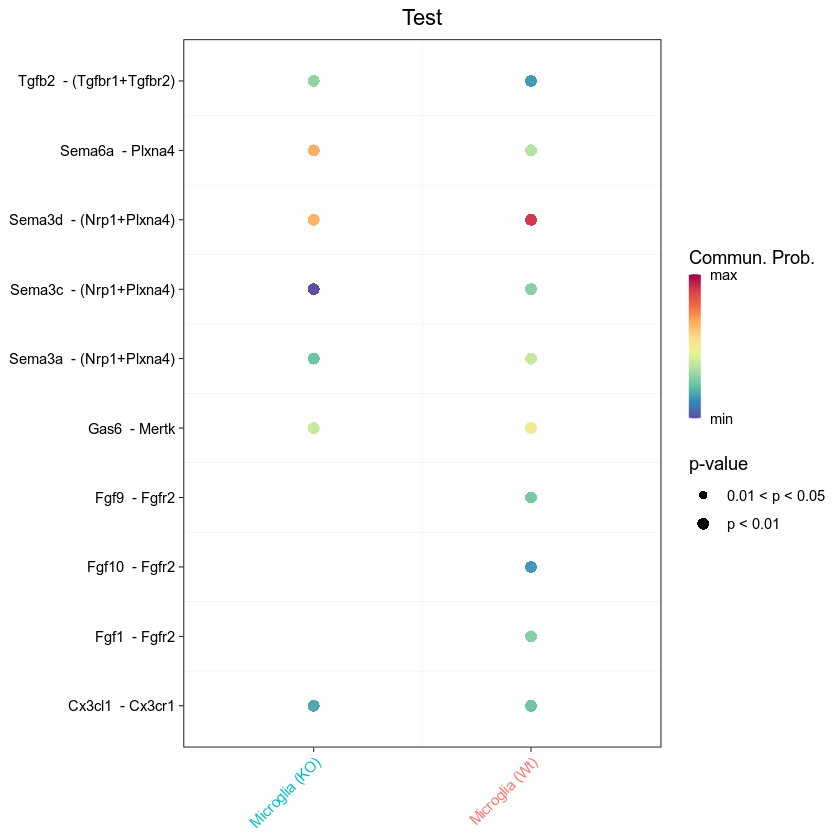

In [6]:
# adapat CellChat function to recreate bubble plots
jk.visualBubble = function(df = out$communication,
                           celltype.use = NULL,
                           comparison = c(1,2),
                           ggplot.y = "target", #if facet, set to target, if single, set to source.target2
                           title.name = NULL,
                           mode = c("facet", "single")
                          ){
    
    df$source.target2 = paste0(df$target, " (", df$dataset,")") 
    df$dataset = factor(df$dataset, levels=c("WT", "KO"))

    color.use = RColorBrewer::brewer.pal(n= 10, name = c("Spectral"))
    color.grid = "grey90"
    comparison = c(1,2)
    color.text.use = TRUE
    line.on=TRUE
    line.size = 0.2
    dataset.name = cellchat@net %>% names()
    group.names0 = df$group.names
    
    df = df %>% filter(!is.na(prob)) 
    
    g = ggplot(df, aes(x = factor(get(ggplot.y)), y = interaction_name_2, color = prob, size = pval)) +
    geom_point(pch = 16) +
    theme_linedraw() + theme(panel.grid.major = element_blank()) +
    theme(axis.text.x = element_text(angle = 45, hjust= 1, vjust = 1),
          axis.title.x = element_blank(),
          axis.title.y = element_blank()) +
    scale_x_discrete(position = "bottom")

  values <- c(1,2,3); names(values) <- c("p > 0.05", "0.01 < p < 0.05","p < 0.01")
  g <- g + scale_radius(range = c(min(df$pval), max(df$pval)), breaks = sort(unique(df$pval)),
                        labels = names(values)[values %in% sort(unique(df$pval))], name = "p-value")
    
  if (min(df$prob, na.rm = T) != max(df$prob, na.rm = T)) {
    g <- g + scale_colour_gradientn(colors = colorRampPalette(rev(color.use))(99), na.value = "white", limits=c(quantile(df$prob, 0,na.rm= T), quantile(df$prob, 1,na.rm= T)),
                                    breaks = c(quantile(df$prob, 0,na.rm= T), quantile(df$prob, 1,na.rm= T)), labels = c("min","max")) +
      guides(color = guide_colourbar(barwidth = 0.5, title = "Commun. Prob."))
  } else {
    g <- g + scale_colour_gradientn(colors = colorRampPalette(rev(color.use))(99), na.value = "white") +
      guides(color = guide_colourbar(barwidth = 0.5, title = "Commun. Prob."))
  }

    if (length(unique(df$source.target)) > 1) {
      g <- g + geom_vline(xintercept=seq(1.5, length(unique(df$source.target2))-0.5, 1),lwd=0.1,colour=color.grid)
    }
    if (length(unique(df$interaction_name_2)) > 1) {
      g <- g + geom_hline(yintercept=seq(1.5, length(unique(df$interaction_name_2))-0.5, 1),lwd=0.1,colour=color.grid)
    }

    color <- ggPalette(2) 
    names(color) = cellchat@net %>% names()

    if (mode == "single"){
        dataset.name.order = levels(factor(df$source.target2))
        dataset.name.order = stringr::str_match(dataset.name.order, "\\(.*\\)")
        dataset.name.order = stringr::str_sub(dataset.name.order, 2, stringr::str_length(dataset.name.order) -1)
        xtick.color = color[dataset.name.order]
        
        g <- g + theme(axis.text.x = element_text(color = xtick.color))

    }
  if(mode == "facet"){
      g <- g + facet_wrap(~ dataset)
  }
      g = g + ggtitle(title.name) + theme(plot.title = element_text(hjust = 0.5)) 
  
    return(g)
}

jk.visualBubble(title.name ="Test", mode = 'single',
                ggplot.y = "source.target2" #if facet, set to target, if single, set to source.target2
)


### Bubble plots have empty holes, use own function to fix

In [32]:
#Use own code to fix NAs in data

pdf("001C_KOvsWT_majorCelltypes_visualize_LR_pairs_changes_per_celltype_JK_function.pdf", width = 11, height = 8)

for (each in celltypes){
    
    out = netVisual_bubble(cellchat, sources.use = each, #targets.use = c(5:11),
                 comparison = c(1, 2), max.dataset = 1, return.data = T)
    
    p1 <- netVisual_bubble(cellchat, sources.use = each, #targets.use = c(5:11),
                 comparison = c(1, 2), max.dataset = 2, title.name = paste0("Increased in KO: ", each), 
                 angle.x = 45, remove.isolate = T, return.data = T)
    
    plot.p1 = jk.visualBubble(df = p1$communication, 
                              title.name = paste0("Increased sigaling from ", each, " in KO"),                    
                              mode = 'single',
                              ggplot.y = "source.target2" 
                              #if facet, set to target, if single, set to source.target2
                             )

    
    print(plot.p1)
    
    p2 <- netVisual_bubble(cellchat, sources.use = each, #targets.use = c(5:11),
                 comparison = c(1, 2), max.dataset = 1, title.name = paste0("Decreased in KO: ", each), 
                 angle.x = 45, remove.isolate = T, return.data = T)
    
    plot.p2 = jk.visualBubble(df = p2$communication, 
                              title.name = paste0("Decreased sigaling from ", each, " in KO"),                    
                              mode = 'single',
                              ggplot.y = "source.target2" 
                              #if facet, set to target, if single, set to source.target2
                             )
    print(plot.p2)
}

dev.off()

Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing communications on a merged object 


Comparing com

png 
  2